In [433]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [383]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Flipr Hackathons/Hackathon 6.0/Train_dataset.xlsx')
df1 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Flipr Hackathons/Hackathon 6.0/Test_dataset.xlsx')

In [308]:
display(df.head())
print(df.shape)

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


(787, 16)


In [309]:
df.describe()

,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
count,7.390000e+02,2.950000e+02,777.000000,769.000000,770.000000,761.000000,629.000000,647.000000,6.460000e+02,772.000000,6.970000e+02,787.00000
mean,3.102834e+05,5.320451e+05,905.712999,26.183355,30.941558,96.086728,150.373609,0.497069,2.910011e+05,41.849741,1.457945e+06,6615.64676
std,8.874849e+05,1.067831e+06,37.018542,2.113063,6.968289,30.532991,29.063767,0.293421,8.354348e+05,29.086939,1.664151e+06,15108.10276
min,3.677600e+04,2.935400e+04,818.000000,23.000000,5.000000,50.000000,100.000000,0.003074,3.091300e+04,10.000000,7.980000e+02,334.00000
25%,5.255000e+04,1.694320e+05,877.000000,24.000000,28.000000,70.000000,125.000000,0.238586,4.514450e+04,18.000000,2.378540e+05,2270.00000
50%,7.910600e+04,2.366000e+05,906.000000,26.000000,31.000000,92.000000,150.000000,0.507004,8.306750e+04,28.000000,6.365020e+05,2582.00000
75%,2.374765e+05,4.745850e+05,928.000000,28.000000,36.000000,119.000000,176.000000,0.752517,2.206772e+05,67.000000,3.104060e+06,8761.00000
max,1.244237e+07,1.197845e+07,1042.000000,32.000000,40.000000,227.000000,200.000000,0.999774,1.092440e+07,159.000000,4.684707e+06,218502.00000


In [310]:
df.isna().sum()

City                   0
State                  0
Type                   0
Population [2011]     48
Popuation [2001]     492
Sex Ratio             10
Median Age            18
Avg Temp              17
SWM                    4
Toilets Avl           26
Water Purity         158
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

In [384]:
df = df.drop(['City', 'Popuation [2001]', 'Female Population'], axis = 1)
df.head()

,State,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,# of hospitals,Foreign Visitors,Covid Cases
0,Maharashtra,M.C,12442373.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,159.0,4408916.0,163115
1,Delhi,M.C,11007835.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,148.0,2379169.0,80188
2,Karnataka,MPUA,8436675.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,123.0,636502.0,141000
3,Telangana,MPUA,6809970.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,110.0,126078.0,55123
4,Gujarat,MPUA,5570585.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,73.0,284973.0,33204


In [385]:
df['Population [2011]'] = df['Population [2011]'].fillna(df['Population [2011]'].mean())
df['Sex Ratio'] = df['Sex Ratio'].fillna(df['Sex Ratio'].mean())
df['Median Age'] = df['Median Age'].fillna(df['Median Age'].mean())
df['Avg Temp'] = df['Avg Temp'].fillna(df['Avg Temp'].mean())
df['Toilets Avl'] = df['Toilets Avl'].fillna(df['Toilets Avl'].mean())
df['SWM'] = df['SWM'].fillna(df['SWM'].mode()[0])
df['Water Purity'] = df['Water Purity'].fillna(df['Water Purity'].mean())
df['H Index'] = df['H Index'].fillna(df['H Index'].mean())
# df['Female Population'] = df['Female Population'].fillna(df['Female Population'].mean())
df['# of hospitals'] = df['# of hospitals'].fillna(df['# of hospitals'].mean())
df['Foreign Visitors'] = df['Foreign Visitors'].fillna(df['Foreign Visitors'].mean())
# df[''] = df[''].fillna(df[''].mean())

In [386]:
mnx = StandardScaler()
df.SWM = df.SWM.replace({'LOW':1, 'MEDIUM':2, 'HIGH':3})
temp = pd.get_dummies(df, columns=['Type', 'State'])

# temp['Popuation [2001]'] = mnx.fit_transform(temp['Popuation [2001]'].values.reshape(-1, 1))
temp['Population [2011]'] = mnx.fit_transform(temp['Population [2011]'].values.reshape(-1, 1))
temp['Sex Ratio'] = mnx.fit_transform(temp['Sex Ratio'].values.reshape(-1, 1))
temp['Median Age'] = mnx.fit_transform(temp['Median Age'].values.reshape(-1, 1))
temp['Avg Temp'] = mnx.fit_transform(temp['Avg Temp'].values.reshape(-1, 1))
temp['Toilets Avl'] = mnx.fit_transform(temp['Toilets Avl'].values.reshape(-1, 1))
temp['Water Purity'] = mnx.fit_transform(temp['Water Purity'].values.reshape(-1, 1))
temp['H Index'] = mnx.fit_transform(temp['H Index'].values.reshape(-1, 1))
# temp['Female Population'] = mnx.fit_transform(temp['Female Population'].values.reshape(-1, 1))
temp['# of hospitals'] = mnx.fit_transform(temp['# of hospitals'].values.reshape(-1, 1))
temp['Foreign Visitors'] = mnx.fit_transform(temp['Foreign Visitors'].values.reshape(-1, 1))
print(temp.shape)
temp.head()

(787, 81)


,Population [2011],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,# of hospitals,Foreign Visitors,Covid Cases,Type_C-1T,Type_C.B,Type_C.M.C,Type_C.T,Type_C.T.,Type_CMC,Type_M,Type_M Cl,Type_M.B,Type_M.B.,Type_M.C,Type_M.Cl,Type_M.Cl.,Type_M.Corp,Type_M.Corp.,Type_MB,Type_MPUA,Type_N.A,Type_N.A.C,Type_N.P,Type_N.P.,Type_N.P.P,Type_N.P.P.,Type_N.Pd,Type_N.T,Type_NP,Type_NPP,Type_Nagar Parishad,Type_Np,...,Type_T.C,Type_T.M.C,Type_T.M.C.,Type_T.P,Type_T.P.,Type_U.A,Type_UA,State_Andaman and Nicobar Islands,State_Andhra Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu and Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Tamil nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,14.116721,-0.753912,-1.525034,0.153661,2,4.096472,-0.014390,0.765010,4.069166,1.885623,163115,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12.447514,-1.297998,0.391226,-0.136693,2,3.963160,1.757405,1.590990,3.687086,0.588647,80188,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.455750,0.823936,0.870291,0.879547,3,3.863175,-1.863220,-1.504603,2.818721,-0.524889,141000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7.562940,0.660710,-1.525034,0.008484,2,4.029816,-1.246943,1.243887,2.367171,-0.851042,55123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,6.120810,-1.461223,1.349356,-0.862578,1,4.363097,-1.593599,1.319861,1.081991,-0.749510,33204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


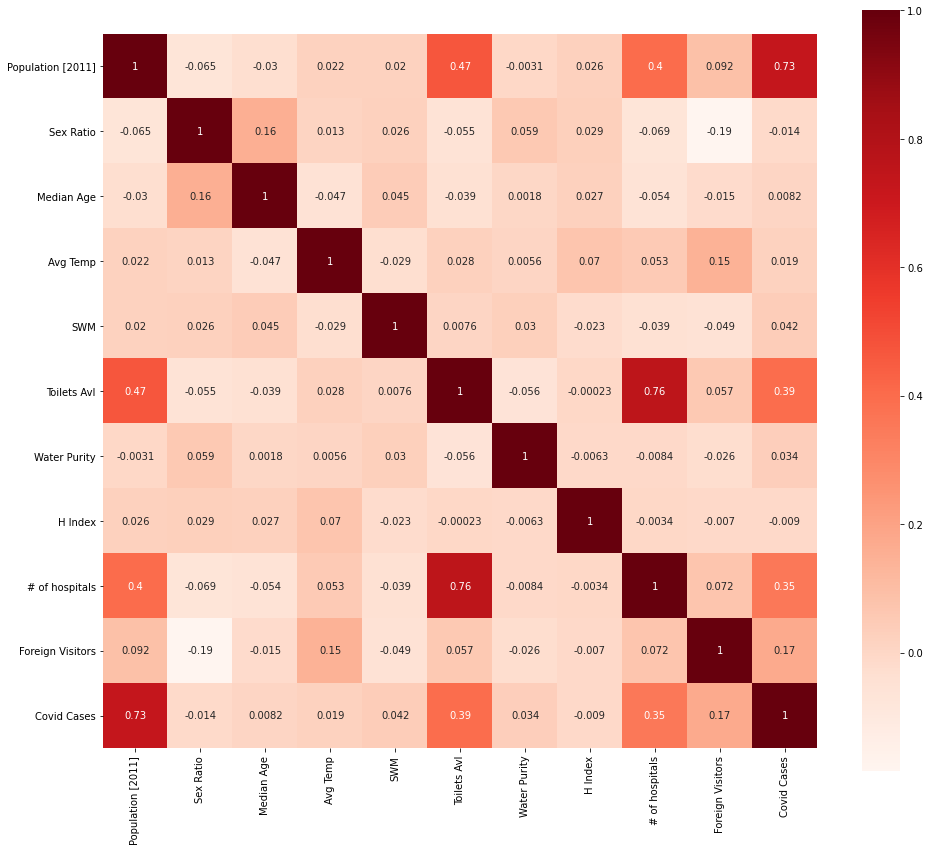

In [387]:
plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot = True, cmap = plt.cm.Reds, square=True)

In [315]:
temp.shape

(787, 83)

In [388]:
y = temp['Covid Cases']
x = temp.drop(['Covid Cases'], axis = 1)

In [444]:
xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, random_state=0)

In [445]:
reg = Lasso().fit(xtrain, ytrain)
print(" Training score : {}".format(reg.score(xtrain, ytrain)))
print("Validation score: {}".format(reg.score(xvalid, yvalid)))

 Training score : 0.5929712415258346
Validation score: 0.5780164004462172


In [479]:
svreg = SVR(kernel='rbf').fit(xtrain, ytrain)
print(" Training score : {}".format(svreg.score(xtrain, ytrain)))
print("Validation score: {}".format(svreg.score(xvalid, yvalid)))

 Training score : -0.062207617891228965
Validation score: -0.10804236834236614


In [457]:
# max = 0
# answer = -1
# for i in range(1, 100):
dreg = DecisionTreeRegressor(random_state=0, max_depth = 11).fit(xtrain, ytrain)
print(" Training score : {}".format(dreg.score(xtrain, ytrain)))
print("Validation score: {}".format(dreg.score(xvalid, yvalid)))
#     if (dreg.score(xvalid, yvalid) > max):
#         max = dreg.score(xvalid, yvalid)
#         answer = i
# print(answer)

 Training score : 0.9974968630762399
Validation score: 0.23964096197616291


In [448]:
# max = 0
# answer = -1
for i in range(1, 9):
    knnreg = KNeighborsRegressor(i).fit(xtrain, ytrain)
    print(" Training score : {}".format(knnreg.score(xtrain, ytrain)))
    print("Validation score: {}".format(knnreg.score(xvalid, yvalid)))
#     if (knnreg.score(xvalid, yvalid) > max):
#         max = knnreg.score(xvalid, yvalid)
#         answer = i
# print(answer)

 Training score : 1.0
Validation score: -0.14259324748287772
 Training score : 0.8644887448904461
Validation score: 0.08749585663004089
 Training score : 0.6794839498057608
Validation score: 0.4805943516608512
 Training score : 0.6765435385042359
Validation score: 0.5599360416607272
 Training score : 0.6579101138425008
Validation score: 0.7096823991556012
 Training score : 0.6187291789740148
Validation score: 0.7963700961701801
 Training score : 0.5675923427606326
Validation score: 0.788051820158118
 Training score : 0.5382880552292386
Validation score: 0.8596404530481156


In [458]:
# max = 0
# answer = -1
# for i in range(2, 41):
randreg = RandomForestRegressor(random_state=0, max_depth = 27).fit(xtrain, ytrain)
print(" Training score : {}".format(randreg.score(xtrain, ytrain)))
print("Validation score: {}".format(randreg.score(xvalid, yvalid)))
#     if (randreg.score(xvalid, yvalid) > max):
#         max = randreg.score(xvalid, yvalid)
#         answer = i
# print(answer)

 Training score : 0.9500313140347478
Validation score: 0.5174978406028123


In [482]:
# max = 0
# answer = -1
# for i in range(1, 21):
gbreg = GradientBoostingRegressor(random_state=0, max_depth=2).fit(xtrain, ytrain)
print(" Training score : {}".format(gbreg.score(xtrain, ytrain)))
print("Validation score: {}".format(gbreg.score(xvalid, yvalid)))
#     if (gbreg.score(xvalid, yvalid) > max):
#         max = gbreg.score(xvalid, yvalid)
#         answer = i
# print(answer)

 Training score : 0.9753919678846525
Validation score: 0.29035350803766


In [485]:
crs = cross_validate(RandomForestRegressor(random_state=0), x, y, cv=2, scoring='r2')

In [486]:
crs['test_score'].mean()

-0.3607712105224654